In [22]:
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

In [5]:
mnist = sklearn.datasets.load_digits()

In [8]:
X = mnist.data
y = mnist.target

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
X = StandardScaler().fit_transform(X)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logreg = LogisticRegression()

In [11]:
from sklearn.model_selection import KFold, cross_val_score

In [15]:
kf = KFold(n_splits=5, shuffle=True)

In [19]:
crv_scores = cross_val_score(logreg,
                             X,
                            y,
                            cv=kf,
                            scoring='accuracy',
                            n_jobs=-1)

In [21]:
crv_scores.mean()

0.967726709996905

# ROC curve

In [23]:
from sklearn.datasets import make_classification

In [24]:
features,target = make_classification(n_samples=10000,
                                     n_features=10,
                                     n_classes=2,
                                     n_informative=3,
                                     random_state=3)

In [25]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test, y_train, y_test = train_test_split(features,target, test_size=0.2)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg = LogisticRegression().fit(X_train,y_train)

In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [33]:
accuracy_score(logreg.predict(X_test),y_test)

0.8435

In [48]:
target_probs = logreg.predict_proba(X_test)

In [50]:
target_probs = target_probs[:,1]

In [51]:
y_test.shape, target_probs.shape

((2000,), (2000,))

In [52]:
fpr,tpr,threshold = roc_curve(y_test,target_probs)

(-0.006, 1.0)

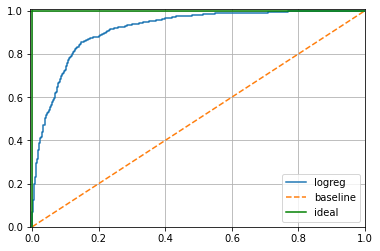

In [117]:
plt.plot(fpr,tpr,label='logreg')
plt.plot([0,1],linestyle='--',label='baseline')
plt.plot([0,0],[0,1],c='green',label='ideal')
plt.plot([0,1],[1,1],c='green')
plt.grid(True)
plt.legend()
plt.gca().set_ylim(0,1.006)
plt.gca().set_xlim(-0.006,1)

# Visualizing confusion matrix

In [118]:
iris = sklearn.datasets.load_iris()

In [119]:
X = iris.data
y = iris.target

In [120]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.1)

In [121]:
clf = LogisticRegression()

In [123]:
preds = clf.fit(X_train,y_train).predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
conf = confusion_matrix(y_test,preds)

In [129]:
import seaborn as sns

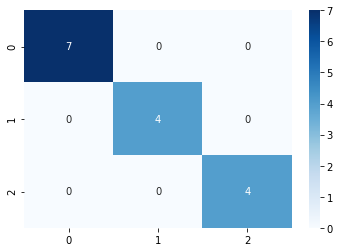

In [140]:
sns.heatmap(conf,annot=True,cmap='Blues')